# Predicting FIFA World Cup 2022

## Importing libraries

In [196]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

## Reading the database

In [197]:
final_df = pd.read_csv('data/train_features.csv')
final_df.tail()

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_team_result_numeric
9316,Netherlands,Wales,10,18,81.0,74.0,85.0,83.0,84.0,75.0,73.0,78.0,1
9317,Poland,Belgium,26,2,87.0,89.0,75.0,85.0,76.0,81.0,86.0,86.0,0
9318,Chile,Ghana,28,60,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0,0
9319,Japan,Tunisia,23,35,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0,0
9320,Korea Republic,Egypt,29,32,75.0,70.0,73.0,80.0,74.0,70.0,79.0,71.0,1


### Train data 

get X and y

In [198]:
y=final_df['home_team_result_numeric']
#y=pd.get_dummies(final_df['home_team_result_numeric'])
X=final_df.iloc[:,2:-1]

scaling

In [199]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X)

slit data to train and test 

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

metrics function

In [201]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

In [202]:
def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict,average='macro')
    print("f1: %.2f%%" % (f1 * 100.0)) 
    rec = recall_score(y_test, y_predict, average='macro')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='macro')
    print("precision: %.2f%%" % (prc * 100.0)) 

In [203]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

### Train the model 

Neural network


In [204]:
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import Input

X_train.shape

(8388, 10)

In [205]:
model = Sequential()
model.add(Input(shape=(10,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
210/210 [==============================] - 2s 6ms/step - loss: 15.2930 - accuracy: 0.3539 - val_loss: 0.9126 - val_accuracy: 0.2199
Epoch 2/10
210/210 [==============================] - 1s 4ms/step - loss: 0.8540 - accuracy: 0.3382 - val_loss: 0.7786 - val_accuracy: 0.2193
Epoch 3/10
210/210 [==============================] - 1s 4ms/step - loss: 0.6809 - accuracy: 0.3314 - val_loss: 0.6520 - val_accuracy: 0.2151
Epoch 4/10
210/210 [==============================] - 1s 5ms/step - loss: 0.6226 - accuracy: 0.3276 - val_loss: 0.6064 - val_accuracy: 0.2199
Epoch 5/10
210/210 [==============================] - 1s 5ms/step - loss: 0.5653 - accuracy: 0.3279 - val_loss: 0.5656 - val_accuracy: 0.2199
Epoch 6/10
210/210 [==============================] - 1s 5ms/step - loss: 0.5558 - accuracy: 0.3469 - val_loss: 0.5215 - val_accuracy: 0.2199
Epoch 7/10
210/210 [==============================] - 1s 5ms/step - loss: 0.5345 - accuracy: 0.3370 - val_loss: 0.5239 - val_accuracy: 0.2205
Epoch

confusion_matrix: 
Classification results:
f1: 15.67%
recall: 24.49%
precision: 11.53%
              precision    recall  f1-score   support

           0       0.10      0.20      0.13       116
           1       0.00      0.00      0.00       241
           2       0.24      0.54      0.34       110

    accuracy                           0.18       467
   macro avg       0.12      0.24      0.16       467
weighted avg       0.08      0.18      0.11       467



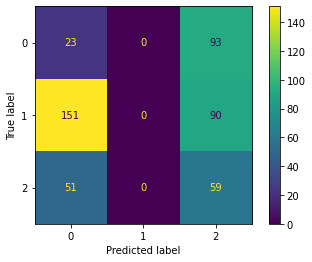

In [206]:

y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1,axis=1)

print("confusion_matrix: ")
evaluate_results(y_test, y_pred1)
print(classification_report(y_test,y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1);

Classification report for classifier SVC(C=1000000.0, gamma='auto'):
              precision    recall  f1-score   support

           0       0.18      0.03      0.05       116
           1       0.51      0.95      0.67       241
           2       0.43      0.03      0.05       110

    accuracy                           0.50       467
   macro avg       0.37      0.33      0.25       467
weighted avg       0.41      0.50      0.37       467


confusion_matrix: 
Classification results:
f1: 25.44%
recall: 33.31%
precision: 37.32%
              precision    recall  f1-score   support

           0       0.18      0.03      0.05       116
           1       0.51      0.95      0.67       241
           2       0.43      0.03      0.05       110

    accuracy                           0.50       467
   macro avg       0.37      0.33      0.25       467
weighted avg       0.41      0.50      0.37       467



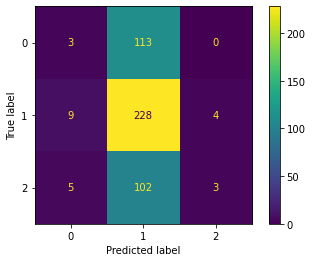

In [208]:
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix
#%% Using SVM model to test 
#=============================================================================
clf = svm.SVC(kernel='rbf',gamma='auto',C=1E6)
clf.fit(X_train,y_train)

y_pred2=clf.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred2)))

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cnf_matrix = confusion_matrix(y_test, y_pred2)

print("confusion_matrix: ")
evaluate_results(y_test, y_pred2)
print(classification_report(y_test,y_pred2))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred2);